<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - Take Home



---
#### Guidelines 
- This is your notebook for your take home midterm. 
- This part of your midterm, as you might expect, is **more challenging** so I highly recommend you to work ASAP. 

- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, cause your answers will be considered invalid = **0%**).
- The take home is **15%** of your total midterm score.
- You can work in groups of no more than **3** students.
- Your code **should not be the same** as the rest of your classmates we will check (trust me on this!!), if your code is the same as any of your classmate **your grade will be penalized.**
- The take home is due on **March 20** before class/exam (if you are taking the in-class exam before the rest of the class, you **need** to push your take home part before you commence with the in-class exam) = **NO EXCUSES !!**
- Use this [link][1] to **submit/include** the GitHub link to your take home exam.
[1]: https://docs.google.com/forms/d/e/1FAIpQLSfLkZJY80tw303ss8Ga_2sUMVgumAppWb4tYwssGTbr879_Mw/viewform "link"
- If you find a piece of code online (from someone else), and you decide to use in your midterm, you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
- Finally, you don't need to create a model
---

#### The data

The state of Iowa provides many data sets on their website, we will be using a dataset which contains transactions for all stores that have a class E liquor license. 

The data , data dictionary can be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy).

**However,** since many of you may have had computer issues reading medium size datasets, **everyone** needs to use the 10% dataset version of Iowa liquor sales, located in your dataset folder. 

---

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Load the data from file

---

In [2]:
iowa_path = 'C:/Users/Adam/Desktop/ECON628-01/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'
iowa = pd.read_csv(iowa_path)

In [3]:
iowa.head(3)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34


## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [4]:
iowa.head(10)

# Note: Throughout this exam, every single time I did an operation I would check the result with df.head or df.info type commands
# I erased almost all such checks as they made the document 5 times longer with their large outputs, making it cumbersome to grade

# Taking a look at the first 10 observations together with online data dictionary
# Online data dictionary indicates that these are records of wholesale orders
# Each observation is an item order, info includes order date, store, store info, item, wholesale and retail prices, quantity

### We will have to remove $ signs from State Bottle Cost, State Bottle Retail, and Sale (Dollars)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.00,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.50,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.00,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.50,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.00,5.55
5,04/20/2015,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,$13.32,$19.98,6,$119.88,10.50,2.77
6,08/05/2015,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,$6.66,$9.99,3,$29.97,2.25,0.59
7,06/25/2015,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,$15.75,$23.63,2,$47.26,3.50,0.92
8,01/04/2016,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,$11.49,$17.24,4,$68.96,3.00,0.79
9,11/10/2015,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,Dekuyper Hot Damn!,1000,$7.62,$11.43,2,$22.86,2.00,0.53


In [5]:
# Summary stats:

iowa.describe().T

,count,mean,std,min,25%,50%,75%,max
Store Number,270955.0,3.590264e+03,947.662050,2106.00,2604.0,3722.00,4378.00,9023.00
County Number,269878.0,5.723164e+01,27.341205,1.00,31.0,62.00,77.00,99.00
Category,270887.0,1.043888e+06,50182.111075,1011100.00,1012200.0,1031200.00,1062310.00,1701100.00
Vendor Number,270955.0,2.564344e+02,141.014890,10.00,115.0,260.00,380.00,978.00
Item Number,270955.0,4.597496e+04,52757.043086,168.00,26827.0,38176.00,64573.00,995507.00
Bottle Volume (ml),270955.0,9.248303e+02,493.088489,50.00,750.0,750.00,1000.00,6000.00
Bottles Sold,270955.0,9.871285e+00,24.040912,1.00,2.0,6.00,12.00,2508.00
Volume Sold (Liters),270955.0,8.981351e+00,28.913690,0.10,1.5,5.25,10.50,2508.00
Volume Sold (Gallons),270955.0,2.372830e+00,7.638182,0.03,0.4,1.39,2.77,662.54


In [6]:
# Data types

### We will have to convert:

### Date from object to date data type
### County Number and Category from float to integer (These could just as well be objects as they only act as labels)
### State Bottle Cost, State Bottle Retail, and Sale (Dollars) from object to float

iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

In [7]:
iowa.shape

### Shape is given: (Observations, Variables)

(270955, 18)

In [8]:
# MAKING A NEW COLUMN TO CHECK IF LITER/GALLON FIGURES MATCH AS A CHECK OF DATA QUALITY
# THEY DO! EVERY SINGLE OBSERVATION MATCHES TO WITHIN SOMEWHERE BETWEEN 0.01 AND 0.001 GALLONS, INDICATING THAT ONE COLUMN
# WAS PROBABLY GENERATED AS A TRANSFORM OF THE OTHER.

iowa['L2G'] = iowa['Volume Sold (Liters)'].astype(float)/3.78541
iowa['diff'] = iowa['L2G'].astype(float) - iowa['Volume Sold (Gallons)'].astype(float)
sum(float(x) > 0.001 for x in iowa['diff'])

94830

In [9]:
sum(float(x) > 0.01 for x in iowa['diff'])

0


## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [10]:
# TO CLEAN DATA WE WILL:
# 1) REMOVE $ SIGNS FROM DATA
# 2) REMOVE SPACES FROM COLUMN NAMES
# 3) FILL MISSING VALUES WHERE POSSIBLE, DROP OBSERVATIONS WHERE NOT
# 4) CONVERT DATA TYPES

In [10]:
# Let's start by removing the $ signs from the three columns where they are an issue
# Code coming from: http://stackoverflow.com/questions/13682044/pandas-dataframe-remove-unwanted-parts-from-strings-in-a-column

iowa['State Bottle Cost'] = iowa['State Bottle Cost'].map(lambda x: x.lstrip('$'))
iowa['State Bottle Retail'] = iowa['State Bottle Retail'].map(lambda x: x.lstrip('$'))
iowa['Sale (Dollars)'] = iowa['Sale (Dollars)'].map(lambda x: x.lstrip('$'))


# OK $s gone!
# http://stackoverflow.com/questions/13682044/pandas-dataframe-remove-unwanted-parts-from-strings-in-a-column

In [11]:
# Removing spaces from column names

# Code from: http://stackoverflow.com/questions/11346283/renaming-columns-in-pandas

iowa = iowa.rename(columns=lambda x: x.replace(' ', '_'))

In [12]:
# INVESTIGATING MISSING VALUES

iowa.isnull().sum()

Date                        0
Store_Number                0
City                        0
Zip_Code                    0
County_Number            1077
County                   1077
Category                   68
Category_Name             632
Vendor_Number               0
Item_Number                 0
Item_Description            0
Bottle_Volume_(ml)          0
State_Bottle_Cost           0
State_Bottle_Retail         0
Bottles_Sold                0
Sale_(Dollars)              0
Volume_Sold_(Liters)        0
Volume_Sold_(Gallons)       0
L2G                         0
diff                        0
dtype: int64

In [13]:
# TOTAL MISSING VALLUES

iowa.isnull().sum().sum()

2854

In [14]:
pd.set_option('display.max_rows', 500)
iowa.groupby(['County', 'City'])[['County_Number']].size()

# HERE WE SEE OBSERVATIONS BY COUNTY AND THEN CITY...
# GROUPBY CODE COMES FROM ECON 628 GROUPBY LECTURE

County         City             
Adair          ADAIR                   43
               FONTANELLE              62
               GREENFIELD             195
               STUART                 285
Adams          CORNING                234
Allamakee      HARPERS FERRY           48
               LANSING                151
               POSTVILLE               46
               WAUKON                 800
Appanoose      CENTERVILLE            976
               MORAVIA                 67
Audubon        AUDUBON                205
               EXIRA                   22
Benton         BELLE PLAINE           414
               SHELLSBURG             330
               URBANA                  29
               VINTON                 206
Black Hawk     CEDAR FALLS           5735
               EVANSDALE              484
               GILBERTVILLE             6
               HUDSON                  40
               LA PORTE CITY          248
               RAYMOND                144
 

In [15]:
iowa.groupby(['City', 'County'])[['County_Number']].size()

# HERE WE SEE OBSERVATIONS BY CITY AND THEN COUNTY 

City               County       
ACKLEY             Hardin              57
                   Webster             34
ADAIR              Adair               43
ADEL               Dallas             318
AFTON              Union               12
AKRON              Plymouth            69
ALBIA              Monroe             342
ALDEN              Hardin             122
ALGONA             Kossuth           1025
ALLISON            Butler              83
ALTA               Buena Vista         14
ALTOONA            Polk              2104
AMES               Story             7548
ANAMOSA            Jones              583
ANITA              Cass               149
ANKENY             Polk              4836
ANTHON             Woodbury           164
ARLINGTON          Fayette             76
ARMSTRONG          Emmet               17
ARNOLD'S PARK      Dickinson          242
ARNOLDS PARK       Dickinson          498
ATLANTIC           Cass              1041
AUDUBON            Audubon            205
A

In [16]:
# WE SEE THAT THE CITIES OF ACKLEY, BETTENDORF, CLIVE, CORNING, FORT DODGE,  
# NEWTON, NORTH LIBERTY, OSKALOOSA, PERRY, STATE CENTER,  AND WEST DES MOINES ARE IN MORE THAN ONE COUNTY
# IT MAY BE THAT THERE ARE TWO ACKLEYS IN SEPARATE PLACES OR THAT THE SINGLE CITY OF ACKLEY LIES BETWEEN TWO COUNTIES
# OR THAT THERE ARE ERRORS IN THE DATA
# LET'S INVESTIGATE USING GOOGLE MAPS:

# ACKLEY, CLIVE, WEST DES MOINES : EACH CITY SITS BETWEEN TWO COUNTIES; NO PROBLEM LEAVE ALONE
# BETTENDORF: THERE IS ONLY ONE BETTENDORF IN IOWA AND IT'S IN SCOTT COUNTY SO REPLACE ALL COUNTY VALUES FOR BETTENDORF WITH SCOTT
# CORNING: THERE IS ONLY ONE CORNING; IT IS IN ADAMS COUNTY, REPLACE ALL COUNTY VALUES FOR CORNING WITH ADAMS
# FORT DODGE: JUST ONE, IT IS IN WEBSTER COUNTY, REPLACE ALL COUNTY VALUES FOR FORT DODGE WITH WEBSTER
# NEWTON: JUST ONE, JASPER COUNTY
# NORTH LIBERTY: JUST ONE, JOHNSON COUNTY
# OSKALOOSA: JUST ONE, MAHASKA COUNTY
# PERRY: JUST ONE AND IT LIES WITHIN DALLAS COUNTY, BUT UNLIKE THE OTHER ERRORS ABOVE WHERE THE WRONG COUNTY IS INEXPLICABLY
#        FAR FROM THE CITY IN QUESTION, BOONE COUNTY IS RIGHT NEXT DOOR TO DALLAS COUNTY AND PERRY IS RIGHT AT THE BORDER
#        THESE VALUES DON'T APPEAR TO BE ERRORS SO I WILL LEAVE THEM ALONE
# STATE CENTER: JUST ONE, MARSHALL COUNTY 

In [17]:
iowa.loc[iowa.City == 'BETTENDORF', 'County'] = "Scott"
iowa.loc[iowa.City == 'CORNING', 'County'] = "Adams"
iowa.loc[iowa.City == 'FORT DODGE', 'County'] = "Webster"
iowa.loc[iowa.City == 'NEWTON', 'County'] = "Jasper"
iowa.loc[iowa.City == 'NORTH LIBERTY', 'County'] = "Johnson"
iowa.loc[iowa.City == 'OSKALOOSA', 'County'] = "Mahaska"
iowa.loc[iowa.City == 'STATE CENTER', 'County'] = "Marshall"

# code from http://stackoverflow.com/questions/19226488/python-pandas-change-one-value-based-on-another-value
# Implementing changes explained in above cell

In [18]:
iowa.isnull().sum()

# Above fix corrected logical errors and got rid of 20 missing County values

Date                        0
Store_Number                0
City                        0
Zip_Code                    0
County_Number            1077
County                   1057
Category                   68
Category_Name             632
Vendor_Number               0
Item_Number                 0
Item_Description            0
Bottle_Volume_(ml)          0
State_Bottle_Cost           0
State_Bottle_Retail         0
Bottles_Sold                0
Sale_(Dollars)              0
Volume_Sold_(Liters)        0
Volume_Sold_(Gallons)       0
L2G                         0
diff                        0
dtype: int64

In [19]:
iowa['County'] = iowa.groupby('City')['County'].transform('first')

# Now let's fill the rest of missing county values based on city

In [20]:
iowa.isnull().sum()

# 12 observations remain missing for county, meaning they lack both city and county info. Let's try matching by zip code.

# I ran the following code to try filling the 12 remaining missing county observations by zip code but the data to match these
# values just isn't there. A quick search revealed that zip codes can and do cross county lines so I reran the notebook without
# running this code as it would probably misattribute the counties of several observations. Afterward we will just drop these 12.
# iowa['County'] = iowa.groupby('Zip_Code')['County'].transform('first')

Date                        0
Store_Number                0
City                        0
Zip_Code                    0
County_Number            1077
County                     12
Category                   68
Category_Name             632
Vendor_Number               0
Item_Number                 0
Item_Description            0
Bottle_Volume_(ml)          0
State_Bottle_Cost           0
State_Bottle_Retail         0
Bottles_Sold                0
Sale_(Dollars)              0
Volume_Sold_(Liters)        0
Volume_Sold_(Gallons)       0
L2G                         0
diff                        0
dtype: int64

In [21]:
iowa['County_Number'] = iowa.groupby('County')['County_Number'].transform('first')

# Here we simply group by county and fill missing county number observations with the first value of county number in each group.
# All values are the same so about any transform argument should work. Next we will deal with missing category observations.

In [22]:
iowa['Category_Name'] = iowa.groupby('Item_Number')['Category_Name'].transform('first')
iowa['Category'] = iowa.groupby('Item_Number')['Category'].transform('first')

# Here we group by item number and fill missing category name observations within each group. Identical items should
# have same category name. Line two does the same for category.

In [23]:
iowa.isnull().sum()

Date                      0
Store_Number              0
City                      0
Zip_Code                  0
County_Number            12
County                   12
Category                 47
Category_Name            57
Vendor_Number             0
Item_Number               0
Item_Description          0
Bottle_Volume_(ml)        0
State_Bottle_Cost         0
State_Bottle_Retail       0
Bottles_Sold              0
Sale_(Dollars)            0
Volume_Sold_(Liters)      0
Volume_Sold_(Gallons)     0
L2G                       0
diff                      0
dtype: int64

In [24]:
# Without any more data by which to match and fill missing values, we drop remaining observations with missing values.

iowa.dropna(axis=0, inplace=True)

In [25]:
iowa.info()

# We've gone from 270995 to 270886 observations, a loss of 109 or 0.04% of all obseravtions. Not bad!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270886 entries, 0 to 270954
Data columns (total 20 columns):
Date                     270886 non-null object
Store_Number             270886 non-null int64
City                     270886 non-null object
Zip_Code                 270886 non-null object
County_Number            270886 non-null float64
County                   270886 non-null object
Category                 270886 non-null float64
Category_Name            270886 non-null object
Vendor_Number            270886 non-null int64
Item_Number              270886 non-null int64
Item_Description         270886 non-null object
Bottle_Volume_(ml)       270886 non-null int64
State_Bottle_Cost        270886 non-null object
State_Bottle_Retail      270886 non-null object
Bottles_Sold             270886 non-null int64
Sale_(Dollars)           270886 non-null object
Volume_Sold_(Liters)     270886 non-null float64
Volume_Sold_(Gallons)    270886 non-null float64
L2G                      2

In [26]:
# Let's convert data types

### Date from object to date data type
### County Number and Category from float to integer (These could just as well be objects as they only act as labels)
### State Bottle Cost, State Bottle Retail, and Sale (Dollars) from object to float

iowa['Date'] =  pd.to_datetime(iowa['Date'])

iowa['County_Number'] = iowa['County_Number'].astype(int)
iowa['Category'] = iowa['Category'].astype(int)

iowa['State_Bottle_Cost'] = iowa['State_Bottle_Cost'].astype(float)
iowa['State_Bottle_Retail'] = iowa['State_Bottle_Retail'].astype(float)
iowa['Sale_(Dollars)'] = iowa['Sale_(Dollars)'].astype(float)


# http://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime
# http://stackoverflow.com/questions/21291259/convert-floats-to-ints-in-pandas

### 3.2 Clean the columns

In [27]:
# ALL CLEANING DONE ABOVE


### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life when dealing with data. This isn't a kind of programming where things are just right or wrong.

In [29]:
# LOGICAL ERRORS IN COUNTY ALREADY INVESTIGATED AND CORRECTED...LET'S INVESTIGATE DISTRIBUTIONS AND OUTLIERS IN DATA

In [28]:
def histogram_plotter(title, data):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style('white')
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':2})
    
    dist.axvline(np.mean(data), lw=1, c='darkred', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data))
    title = 'Distribution of ' + title + '; average = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':2})

# Code from lecture 1.3 full analysis

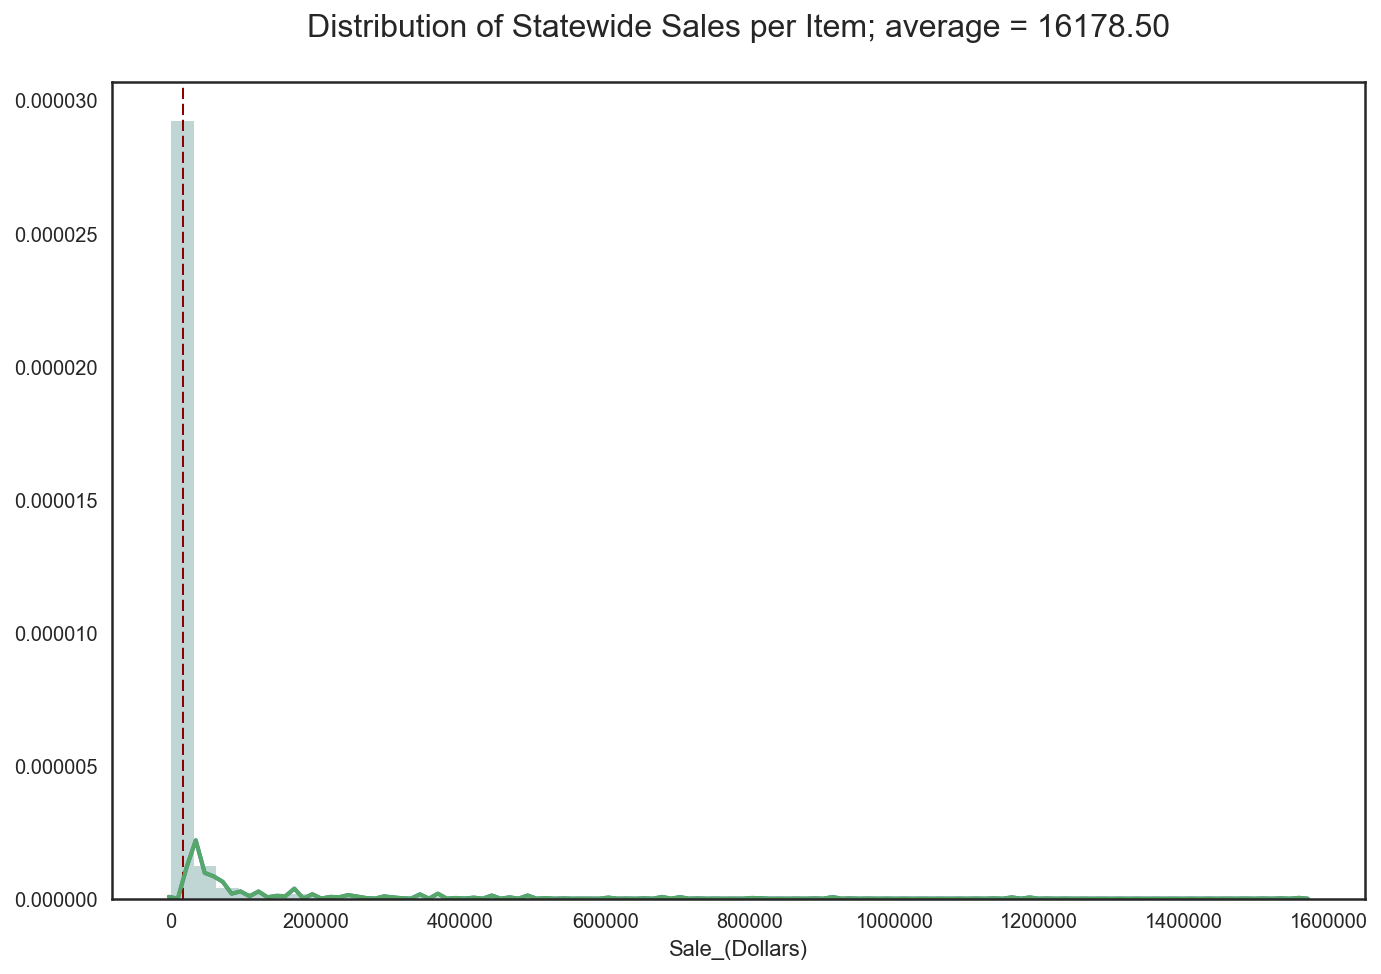

In [32]:
itemsales = iowa.groupby('Item_Description')['Sale_(Dollars)'].sum()
histogram_plotter("Statewide Sales per Item", itemsales)

# Distibution of item sales is very right skewed

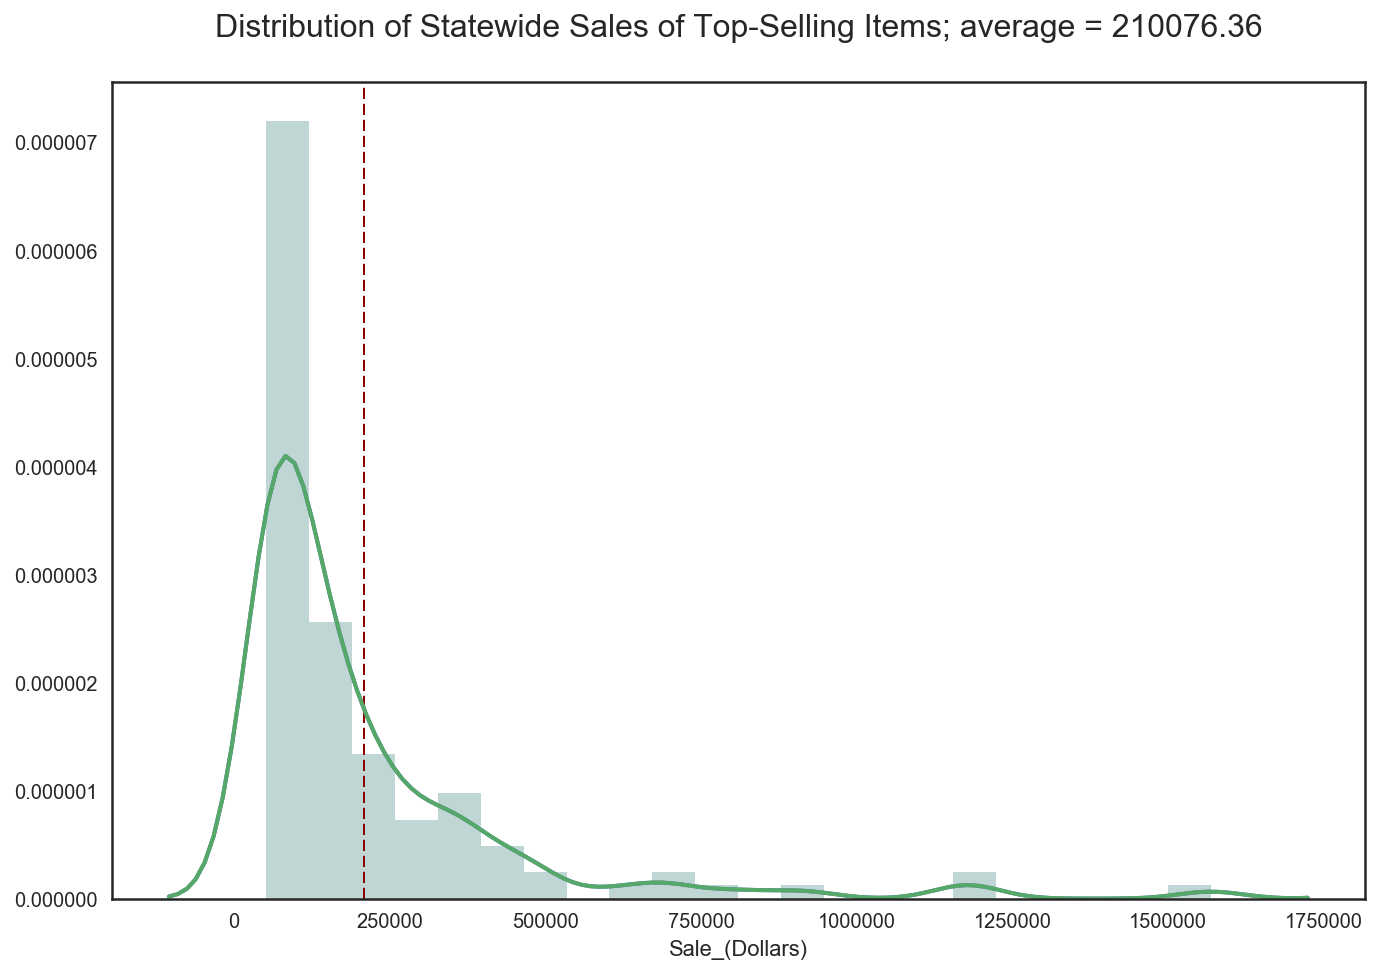

In [33]:
# Here we restrict to big selling items (more than $50k in sales) statewide and have a closer look. These items may be 'outliers' 
# but they are the key products/observations as they have the highest market share.

bigsales = itemsales[(itemsales >= 50000)]
histogram_plotter("Statewide Sales of Top-Selling Items", bigsales)


In [34]:
bigsales.nlargest(30)

# Let's take a look at our  30 biggest selling items. These all make sense except for our biggest seller, Black Velvet.
# It is apparently a Canadian whiskey. I'm a bartender and it's the only thing on this list I haven't heard of...red flag.
# Let's take a closer look.
# http://www.desmoinesregister.com/story/news/2016/12/28/most-popular-liquor-iowa-2016-black-velvet/95916046/
# According to above article from Des Moines Register, Black Velvet is Iowans' liquor of choice. Who knew...

# http://stackoverflow.com/questions/27842613/pandas-groupby-sort-within-groups

Item_Description
Black Velvet                             1568011.64
Jack Daniels Old #7 Black Lbl            1190032.66
Captain Morgan Spiced Rum                1165174.56
Fireball Cinnamon Whiskey                 914368.53
Crown Royal Canadian Whisky               807898.16
Hawkeye Vodka                             705079.94
Absolut Swedish Vodka 80 Prf              678605.69
Grey Goose Vodka                          607205.94
Jagermeister Liqueur                      493388.36
Jameson                                   491082.12
Jim Beam                                  459906.51
Bacardi Superior Rum                      442522.47
Smirnoff Vodka 80 Prf                     441942.27
Jose Cuervo Especial Reposado Tequila     409604.58
Five O'clock Vodka                        376353.08
Captain Morgan Spiced Barrel              368253.00
Crown Royal Regal Apple                   367544.34
Crown Royal                               366709.02
Titos Handmade Vodka                      35221

In [35]:
bv = iowa.loc[iowa.Item_Description == 'Black Velvet']

# Here bv is a slice of our dataframe that only included info on Black Velvet whiskey sales

In [36]:
bv.sort_values('Sale_(Dollars)', ascending=False)

# I tried a lot of things to find logical errors in Black Velvet sales prior to finding the article explaining
# that it is indeed the top-selling liquor in Iowa.

,Date,Store_Number,City,Zip_Code,County_Number,County,Category,Category_Name,Vendor_Number,Item_Number,Item_Description,Bottle_Volume_(ml),State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_(Dollars),Volume_Sold_(Liters),Volume_Sold_(Gallons),L2G,diff
3335,2015-05-04,3814,WEST DES MOINES,50266,77,Polk,1012100,CANADIAN WHISKIES,115,11788,Black Velvet,1750,9.70,14.93,1200,17916.00,2100.00,554.76,554.761571,0.001571
98858,2016-02-25,2595,DENISON,51442,24,Crawford,1012100,CANADIAN WHISKIES,115,11788,Black Velvet,1750,9.70,14.93,1164,17378.52,2037.00,538.12,538.118724,-0.001276
195296,2015-02-23,2558,MOUNT PLEASANT,52641,44,Henry,1012100,CANADIAN WHISKIES,115,11788,Black Velvet,1750,9.70,14.93,1164,17378.52,2037.00,538.12,538.118724,-0.001276
51807,2015-10-08,2595,DENISON,51442,24,Crawford,1012100,CANADIAN WHISKIES,115,11788,Black Velvet,1750,9.45,14.68,1080,15854.40,1890.00,499.29,499.285414,-0.004586
214169,2015-10-19,3385,CEDAR RAPIDS,52402,57,Linn,1012100,CANADIAN WHISKIES,115,11788,Black Velvet,1750,9.45,14.68,1050,15414.00,1837.50,485.42,485.416375,-0.003625
217672,2015-12-23,2593,CARROLL,51401,14,Carroll,1012100,CANADIAN WHISKIES,115,11788,Black Velvet,1750,9.70,14.93,720,10749.60,1260.00,332.86,332.856943,-0.003057
241923,2015-02-04,4107,BOONE,50036,8,Boone,1012100,CANADIAN WHISKIES,115,11788,Black Velvet,1750,9.70,14.93,600,8958.00,1050.00,277.38,277.380786,0.000786
203947,2015-05-19,4311,FORT DODGE,50501,94,Webster,1012100,CANADIAN WHISKIES,115,11788,Black Velvet,1750,9.70,14.93,600,8958.00,1050.00,277.38,277.380786,0.000786
77074,2015-05-27,2505,BOONE,50036,8,Boone,1012100,CANADIAN WHISKIES,115,11788,Black Velvet,1750,9.70,14.93,600,8958.00,1050.00,277.38,277.380786,0.000786
203566,2015-05-22,4482,INDIANOLA,50125,91,Warren,1012100,CANADIAN WHISKIES,115,11788,Black Velvet,1750,9.70,14.93,600,8958.00,1050.00,277.38,277.380786,0.000786


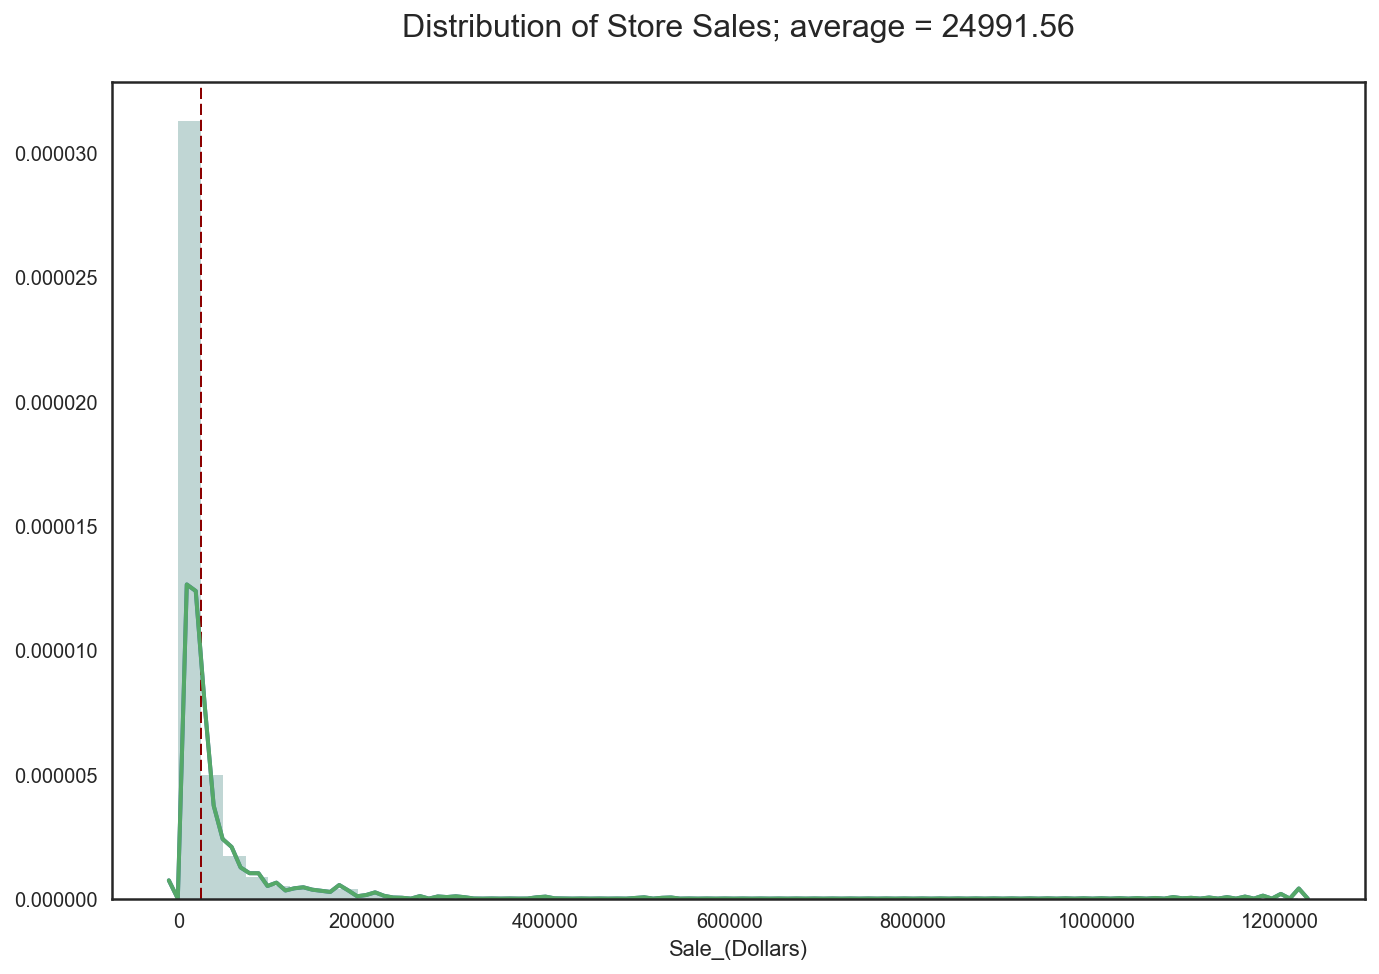

In [37]:
storesales = iowa.groupby('Store_Number')['Sale_(Dollars)'].sum() 
histogram_plotter("Store Sales", storesales)

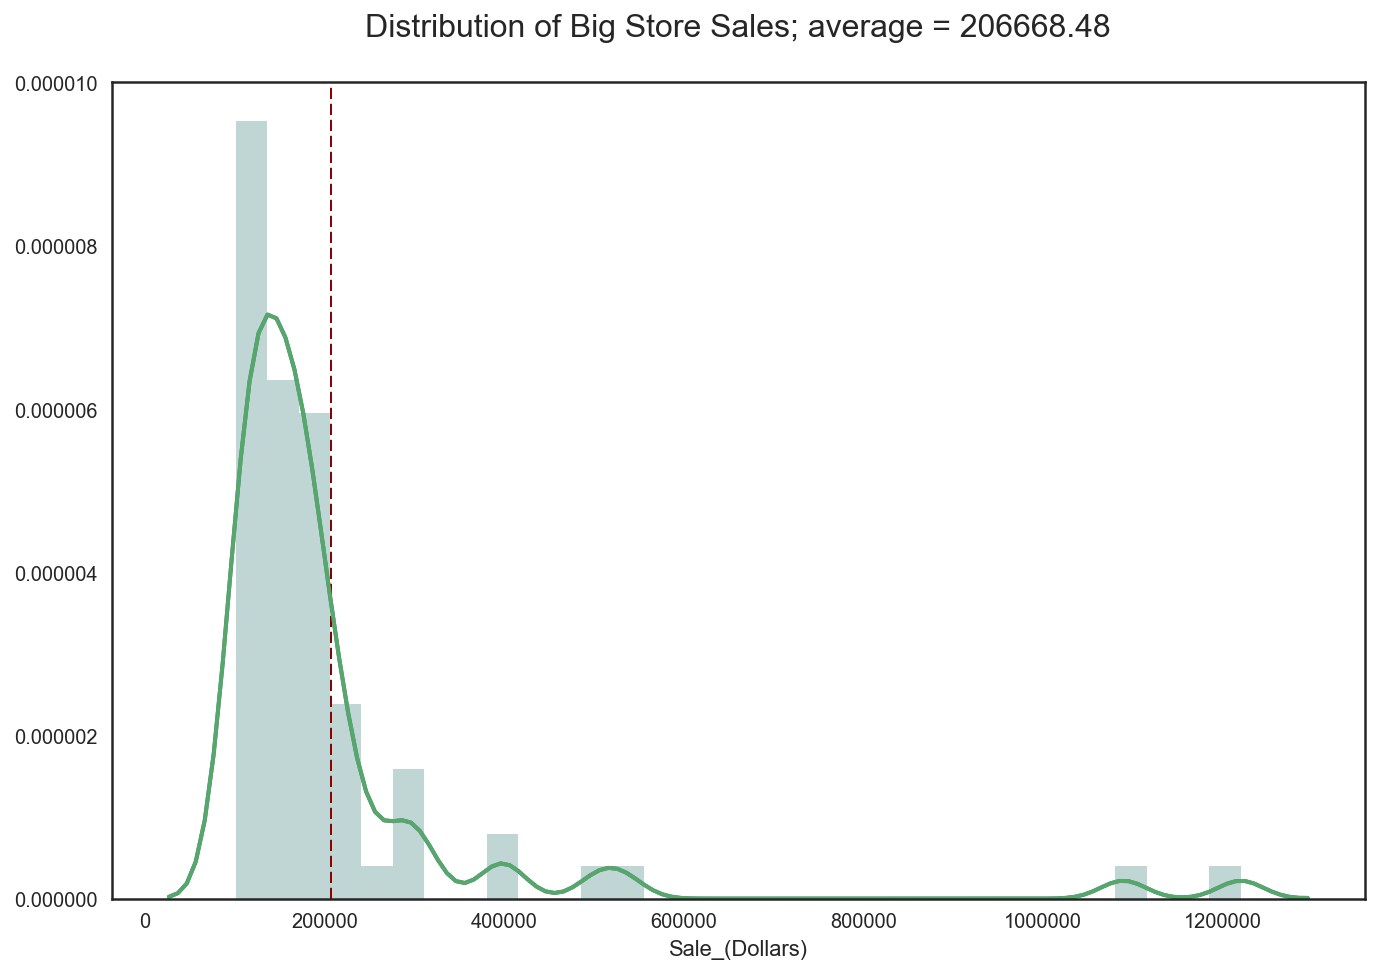

In [38]:
bigstores = storesales[(storesales >= 100000)]
histogram_plotter("Big Store Sales", bigstores)

# Looking just at stores with at least $100,000 liquor sales

In [39]:
# THERE DON'T APPEAR TO BE ANY ELEMENTS THAT ARE LOGICALLY INCONSISTENT AT THE LARGEST SCALE I.E. SOMEONE ENTERING AN EXTRA DIGIT
# AND THROWING OFF RESULTS BY AN ORDER OF MAGNITUDE. 

storesales.nlargest(30)

Store_Number
2633    1219883.53
4829    1089152.87
2512     532265.62
3385     504189.89
3420     402576.06
3952     392451.43
3814     310536.40
3773     298663.20
3354     295593.30
2670     281689.78
3447     263207.92
5102     236403.80
2625     221545.53
2629     219313.27
4167     217082.81
3820     214191.04
2593     212961.57
2663     204906.94
3524     202806.60
2648     192567.48
2616     189979.98
2500     182957.82
2561     182873.19
3477     182635.08
2614     181772.46
3494     178352.22
4312     177062.07
2106     176849.97
2506     176473.09
2501     174814.20
Name: Sale_(Dollars), dtype: float64


## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [100]:
iowa['Month'] = iowa['Date'].dt.month
iowa['Year']=iowa['Date'].dt.year

iowa2015 = iowa[(iowa.Year == 2015)]


iowa2015 = iowa2015.set_index(['Store_Number'])
iowa2015['Monthsinbiz'] = iowa2015.groupby(level=0)['Month'].nunique()

# I create columns in the iowa df containing year of order and month of order
# Then I slice the data creating a sub df of observations from 2015, use store number as index, and create column
# Monthsinbiz by counting unique month values

# dt accessor code: http://stackoverflow.com/questions/26961805/accessing-years-within-a-dataframe-in-pandas

In [47]:
iowa2015['Store_Sales'] = iowa2015.groupby(level=0)['Sale_(Dollars)'].sum()
iowa2015['Extrap'] = iowa2015['Store_Sales']*12/iowa2015['Monthsinbiz']
iowa2015.head()
# Creating a column in iowa2015 for 2015 store sales
# Then creating a column extrapolating for yearly store sales. Multiply by 12 and divide by the number of months in business.
# This obviously assumes homogenous yearly sales patterns, not great, but the best we can do

,Date,City,Zip_Code,County_Number,County,Category,Category_Name,Vendor_Number,Item_Number,Item_Description,...,Sale_(Dollars),Volume_Sold_(Liters),Volume_Sold_(Gallons),L2G,diff,Month,Year,Monthsinbiz,Store_Sales,Extrap
Store_Number,,,,,,,,,,,,,,,,,,,,,
3717,2015-11-04,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,...,81.00,9.00,2.38,2.377550,-0.002450,11,2015,12,9022.86,9022.86
3654,2015-08-18,BELMOND,50421,99,Wright,1031080,VODKA 80 PROOF,297,35918,Five O'clock Vodka,...,129.60,21.00,5.55,5.547616,-0.002384,8,2015,12,9479.30,9479.30
2569,2015-04-20,CEDAR RAPIDS,52402,57,Linn,1041100,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,...,119.88,10.50,2.77,2.773808,0.003808,4,2015,12,48675.15,48675.15
2596,2015-08-05,OTTUMWA,52501,90,Wapello,1051010,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,...,29.97,2.25,0.59,0.594387,0.004387,8,2015,12,30207.68,30207.68
3456,2015-06-25,CLEAR LAKE,50428,17,Cerro Gordo,1012100,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,...,47.26,3.50,0.92,0.924603,0.004603,6,2015,12,69189.36,69189.36


### 5.2 Calculate the profit each store is making in 2015.


In [63]:
iowa2015 = iowa2015.reset_index(drop=True)
iowa2015.head()

,Store_Number,level_0,index,Date,City,Zip_Code,County_Number,County,Category,Category_Name,...,Volume_Sold_(Liters),Volume_Sold_(Gallons),L2G,diff,Month,Year,Monthsinbiz,Store_Sales,Extrap,Item_Cost
0,3717,0,0,2015-11-04,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,...,9.00,2.38,2.377550,-0.002450,11,2015,12,9022.86,9022.86,54.00
1,3654,1,1,2015-08-18,BELMOND,50421,99,Wright,1031080,VODKA 80 PROOF,...,21.00,5.55,5.547616,-0.002384,8,2015,12,9479.30,9479.30,86.40
2,2569,2,2,2015-04-20,CEDAR RAPIDS,52402,57,Linn,1041100,AMERICAN DRY GINS,...,10.50,2.77,2.773808,0.003808,4,2015,12,48675.15,48675.15,79.92
3,2596,3,3,2015-08-05,OTTUMWA,52501,90,Wapello,1051010,AMERICAN GRAPE BRANDIES,...,2.25,0.59,0.594387,0.004387,8,2015,12,30207.68,30207.68,19.98
4,3456,4,4,2015-06-25,CLEAR LAKE,50428,17,Cerro Gordo,1012100,CANADIAN WHISKIES,...,3.50,0.92,0.924603,0.004603,6,2015,12,69189.36,69189.36,31.50


In [101]:
iowa2015['Item_Cost'] = iowa2015['State_Bottle_Cost']*iowa2015['Bottles_Sold']


Store_TC = iowa2015.groupby(['Store_Number'], as_index=False)['Item_Cost'].sum()
iowa2015= pd.merge(iowa2015, Store_TC, on=['Store_Number'], how='right')

# Creating object store total cost Store_TC and merging it back into iowa2015 subdf
# http://stackoverflow.com/questions/37968785/merging-two-dataframes

KeyError: 'Store_Number'

In [93]:
iowa2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218542 entries, 0 to 218541
Data columns (total 27 columns):
level_0                  218542 non-null int64
index                    218542 non-null int64
Store_Number             218542 non-null int64
Date                     218542 non-null datetime64[ns]
City                     218542 non-null object
Zip_Code                 218542 non-null object
County_Number            218542 non-null int32
County                   218542 non-null object
Category                 218542 non-null int32
Category_Name            218542 non-null object
Vendor_Number            218542 non-null int64
Item_Number              218542 non-null int64
Item_Description         218542 non-null object
Bottle_Volume_(ml)       218542 non-null int64
State_Bottle_Cost        218542 non-null float64
State_Bottle_Retail      218542 non-null float64
Bottles_Sold             218542 non-null int64
Sale_(Dollars)           218542 non-null float64
Volume_Sold_(Liters)   

In [ ]:
iowa2015['Store_Profit'] = iowa2015['Extrap'] - iowa2015['Store_TC']*12/iowa2015['Monthsinbiz']


iowa2015.sort('Store_Number').tail(50)

# Create column for total cost of item
# Create column for total cost of all items by store
# Create column for store profit = total revenue minus total cost.
# Note that we have used extrapolated numbers for stores open less than 12 months

### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [102]:
County_Profit = iowa2015.groupby('County_Number')['Store_Profit'].sum()
iowa2015 = pd.merge(iowa2015, County_Profit, on=['County_Number'], how='right')

County_Volume = iowa2015.groupby('County_Number')['Volume_Sold_(Gallons)'].sum()
iowa2015 = pd.merge(iowa2015, County_Volume, on=['County_Number'], how='right')

PPG = iowa2015['County_Profit'] / iowa2015['County_Volume']
iowa2015 = pd.merge(iowa2015, PPG, on=['County_Number'], how='right')


# Create column for county profit
# Create column for total volume sold in county in gallons
# Create column for profit per gallon

KeyError: 'Column not found: Store_Profit'

In [45]:
iowa2015.isnull().sum()

index                         0
Store_Number                  0
Date                          0
City                          0
Zip_Code                      0
County_Number                 0
County                        0
Category                      0
Category_Name                 0
Vendor_Number                 0
Item_Number                   0
Item_Description              0
Bottle_Volume_(ml)            0
State_Bottle_Cost             0
State_Bottle_Retail           0
Bottles_Sold                  0
Sale_(Dollars)                0
Volume_Sold_(Liters)          0
Volume_Sold_(Gallons)         0
L2G                           0
diff                          0
Month                         0
Year                          0
Monthsinbiz                   0
Store_Sales                   0
Extrap                        0
Item_cost                     0
Store_TC                      0
Store_Profit                  0
County_Profit            218444
County_Volume            218444
PPG     

### 5.4  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

In [ ]:
iowa2015['Store_Size'] = iowa2015.groupby('Store_Number')['Volume_Sold_(Gallons)'].sum()

iowa2015['Profitsizeratio'] = iowa2015['Store_Profit']/iowa2015.groupby['Volume_Sold_(Gallons)']
iowa2015.corr('Store_Profit', 'Store_Sales')

### 5.5 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [107]:
iowa2015['Newcat'] = np.where(iowa2015['Category_Name'].str.contains('WHISK'), "Whisky",
        np.where(iowa2015)['Category_Name'].str.contains('BRAND') , "Brandy",
        np.where(iowa2015)['Category_Name'].str.contains('SCHNAPP'), "Schnapps",
        np.where(iowa2015)['Category_Name'].str.contains('GIN'), "Gin",   
        np.where(iowa2015)['Category_Name'].str.contains('TEQUILA'), "Tequila",
        np.where(iowa2015)['Category_Name'].str.contains('SCOTCH'), "Scotch",
        np.where(iowa2015)['Category_Name'].str.contains('RUM'), "Rum",
        np.where(iowa2015)['Category_Name'].str.contains('VODKA'), "Vodka", "Other" )



# Creating new broader categories for liquor type
# http://stackoverflow.com/questions/30634767/python-pandas-dataframe-if-index-contains-any-string-values-apply-label-else-a

TypeError: tuple indices must be integers, not str

### 5.6 Do relationships exist between the broader liquor type and profit?

In [ ]:
# Create a bar graph: Profit vs. Liquor Type


### 5.7 Are there any noticeable relationships between liquor brand and sales? Profit?

In [109]:
iowa2015['Brand'] = iowa2015['Item_Description'].str.extract('([A-Z]\w{0,})', expand=True)
Brand_Sales = iowa2015.groupby('Brand')['Sale_(Dollars)'].sum()



# Brands are listed first in item description so let's extract the first word and create a new column containing just this word
# to identify brand.
# http://stackoverflow.com/questions/35060601/find-substring-in-pandas

### 5.8 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [ ]:
# Our only store-by store data is for sales. We have nothing else by which to categorize stores than location.
# Maybe, however, profit correlates with store size. We already investigated this. Is profitability is correlated with store size,
# We may tax more profitable stores


## 6. Case 2 = Market research for new store locations 

A liquor store owner in Iowa is looking to open a store in a new location and has hired you as a consultant to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [112]:
Q1_2015 = iowa2015[(iowa2015['Month'] == 1 | iowa2015.['Month'] == 2 | iowa2015['Month'] == 3)]

iowa2016 = iowa[(iowa.Year == 2016)]

Q1_2016 = iowa2016[(iowa2016['Month'] == 1 | iowa2016.['Month'] == 2 | iowa2016['Month'] == 3)]




SyntaxError: invalid syntax (<ipython-input-112-1599cdbf6f9a>, line 1)

### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

In [ ]:
ind = Q1_2016.groupby('Store_Number')['Sale_(Dollars)'].sum()*0.5 + 0.5*(Q1_2016-Q1_2015)

# Let's create and index that weights sales and growth equally. Index = .5 times sales + .5 times (2016-2015 sales/2015 sales)

### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

In [ ]:
ind.nlargest(1)

# Recommend location with hightest index

### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

In [ ]:
# Find most profitable liquor category
# Create index for sales and growth of this category
# Find location with highest index